# steo03_mnist_cnn_model

 0. input layer : image(?x28x28 -> ?x28x28x1) -> ? (-1)
 1. Conv layer1 (Conv -> relu -> Pool)
 2. Conv layer2 (Conv -> relu -> Pool)
 3. Flatten layer : 3D[s,h,w,c] -> 1D[s,n] : n = h*w*c
 4. DNN hidden1 layer : [s,n] * [n,node]
 5. DNN output layer : [n,node] * [node,10]

In [1]:

import tensorflow.compat.v1 as tf # ver1.x
tf.disable_v2_behavior() # ver2.0 사용안함

from tensorflow.keras.datasets.mnist import load_data # dataset load
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

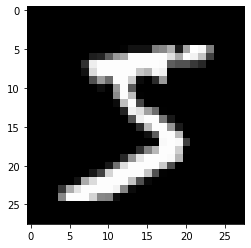

In [2]:

#########################################
## 0. input layer
#########################################


# 1. image read 
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,) : 10진수 
print(x_test.shape) # (10000, 28, 28)
print(y_test.shape) # (10000,) : 10진수 
print(x_train[0]) # 0 ~ 255

# 2. 실수형 변환 : int -> float32
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# 3. 정규화 
x_train = x_train / 255 # x_train = x_train / 255
x_test = x_test / 255

# first image 
img = x_train[0]
plt.imshow(img, cmap='gray') # 숫자 5  cmap='gray'는 엑스레이처럼 대상을 하얗게 보이게 하는 역할

# 4. input image reshape  
x_train = x_train.reshape(-1,28,28,1)  # (size, h, w, color(수일치!))
x_test = x_test.reshape(-1,28,28,1)

# 5. y data 전처리 : one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape  # (60000, 10)


# 6. X, Y, 변수 정의
X_img = tf.placeholder(tf.float32, shape=[None, 28,28,1])
Y = tf.placeholder(tf.float32, shape=[None, 10])



#########################################
## 1. Conv layer1 (Conv -> relu -> Pool)
#########################################

Filter1 = tf.Variable(tf.random_normal([3,3,1,32])) # 32가지 특징

conv2 = tf.nn.conv2d(X_img, Filter1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(conv2) # 정규화 0 ~ x
L1_out = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1_out) # shape=(?, 14, 14, 32)



#########################################
## 2. Conv layer1 (Conv -> relu -> Pool)
#########################################

Filter2 = tf.Variable(tf.random_normal([3,3,32,64]))

conv2_l2 = tf.nn.conv2d(L1_out, Filter2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(conv2_l2) # 정규화 0 ~ x
L2_out = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L2_out) # shape=(?, 7, 7, 64)



#########################################
## 3. Flatten layer : 3D[?,7,7,64] -> 1D[?,3136] : n = 7*7*64
#########################################

n = 7 * 7 * 64
L2_flat = tf.reshape(L2_out, [-1,n])
print(L2_flat) # shape=(?, 3136)




#########################################
## 4. DNN hidden1 layer : [s,n] * [n,node]
#########################################

# Hyper parameters
lr = 0.01
epochs = 10
batch_size = 100
iter_size = 600


# node
hidden_nodes = 128


# hidden layer 
w1 = tf.Variable(tf.random_normal([n ,hidden_nodes]))
b1 = tf.Variable(tf.random_normal([hidden_nodes]))

hidden_layer = tf.nn.relu(tf.matmul(L2_flat, w1) + b1)


#########################################
## 5. DNN output layer : [n,node] * [node,10]
#########################################

# output layer : model 생성
w2 = tf.Variable(tf.random_normal([hidden_nodes, 10]))
b2 = tf.Variable(tf.random_normal([10]))


model = tf.matmul(hidden_layer, w2) + b2



In [3]:

##########################################
### softmax 알고리즘
##########################################
# (1) softmax
softmax = tf.nn.softmax(model)  # 활성함수

# (2) loss function : Softmax + Cross Entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels = Y, logits = model))  # logit은 모델 역할. 활성함수가 없는 모델을 넣으면 자동으로 활성함수에 넣어줌.

# (3)
train = tf.train.AdamOptimizer(0.1).minimize(loss)

# (4) encoding -> decoding
y_pred = tf.argmax(softmax, axis=1)
y_true = tf.argmax(Y, axis=1)



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:

#####################################
### model training
#####################################
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    feed = {X_img : x_train, Y : y_train}
    
    # 반복학습 epochs = 10
    # 1 epoch = 100개 이미지 * 600회 공급 = 60000장
    for epoch in range(epochs) :  # 1세대
        tot_loss = 0
        
        for step in range(iter_size) :  # 600 반복 학습
            idx = np.random.choice(a=y_train.shape[0], size=batch_size, replace=False)  # y_train_one.shape[0] = 60000
            
            # Mini batch dataset
            feed = {X_img:x_train[idx], Y:y_train[idx]}
            _, loss_val = sess.run([train, loss], feed_dict=feed)
            
            tot_loss += loss_val
            
        # 1epoch 종료
        avg_loss = tot_loss / iter_size  # loss의 총합 / loss 수
        print("epoch{} : loss = {}".format(epoch+1, avg_loss))
            
            
    # model test
    feed2 = {X_img:x_test, Y:y_test}
    y_pred_re = sess.run(y_pred, feed_dict=feed2)
    y_true_re = sess.run(y_true, feed_dict=feed2)
    
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_true_re, y_pred_re)
    print("accuracy =", acc)
    

epoch1 : loss = 335.79266803940135
epoch2 : loss = 2.337763722340266
epoch3 : loss = 2.334835761785507
